# Data normalisation


## Learning objectives
* understanding the idea behind the normalisation methods

## Key terms:
* data range
* data distribution
* outlier

## Theoretical aspects


The goal of normalization is to transform or to adjust data/features to be on a similar scale. This improves the performance and training stability of an ML algorithm.

In most cases, data normalisation is used feature-wise (applied for each feature)

Normalisation techniques:
* clipping
* log scaling
* min-max scaling
* standardisation (statistical normalisation or variance scaling)

Useful terms:
* mean = average of some numerical data
* stdDev = standard deviation to the mean of some data
* outlier = a value that is very different from the other data in your data set. This can skew your results. As you can see, having outliers often has a significant effect on your mean and standard deviation.

Some code examples:
* taking into account a single feature
* taking into account two features

## Examples

### Data

In [ ]:
import csv
import matplotlib.pyplot as plt
from math import log, sqrt

In [ ]:
# load all the data from a csv file
def loadDataMoreInputs(fileName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    return dataNames, data

# extract a particular feature (column)
def extractFeature(allData, names, featureName):
    pos = names.index(featureName)
    return [float(data[pos]) for data in allData]

# plot a histogram for some data x
def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 20)
    plt.title('Histogram of ' + variableName)
    plt.show()


### Clipping <img src="images/clipping.svg" width="250">




Theoretical aspects:
* Thresholding the data which caps all feature values above (or below) a certain value to fixed value.

$$ x_i^{new} = \left\{\begin{array}{lr} x_i, & x_i < threshold\\ threshold, x_i \geq threshold \end{array} \right.$$

When to use:
* if your data set contains extreme outliers


Examples:
* you could clip all *roomsPerPerson* values above 4 to be exactly 4 by setting some min and/or max values, it's possible to avoid the outliers


Remarks:
* Clipping changes the distribution

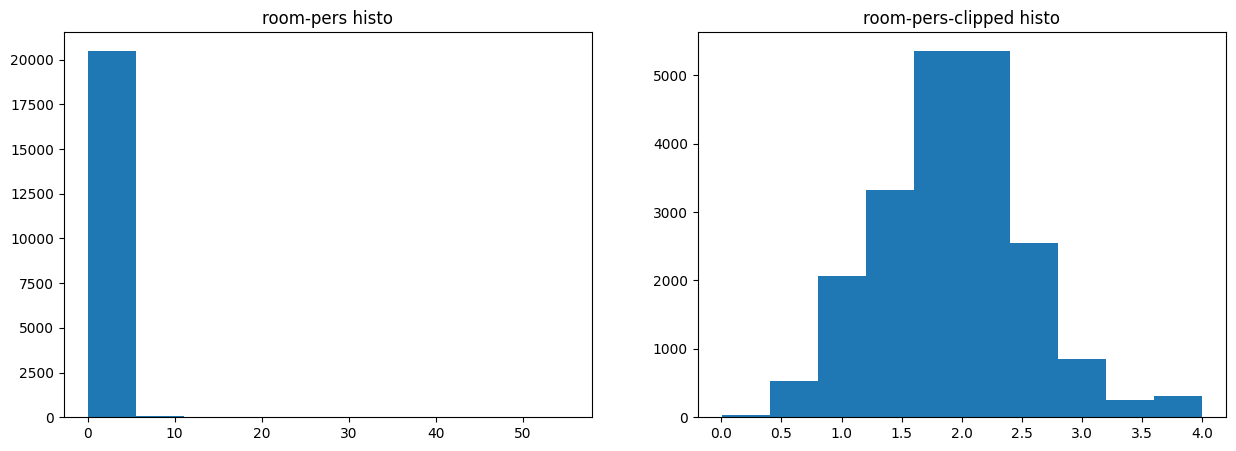

In [ ]:
# clipping
# it helps of avoiding outliers
import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', '/content/housing.csv')

names, allData = loadDataMoreInputs(filePath)

rooms = extractFeature(allData, names, 'total_rooms')
population = extractFeature(allData, names, 'population')

roomsPerPerson = [ float(r / p ) for r, p in zip(rooms, population)]
roomsPerPersonClipped = [rp if rp < 4 else 4 for rp in roomsPerPerson]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(roomsPerPerson)
ax1.set_title('room-pers histo')
ax2.hist(roomsPerPersonClipped)
ax2.set_title('room-pers-clipped histo')
plt.show()


### Log scaling <img src="images/logScale.svg" width="150">


Theoretical aspects:
* Log scaling computes the log of your values to compress a wide range to a narrow range.

$$ x_i^{new} = \log(x_i)$$

When to use:
* Log scaling is helpful when a handful of your values have many points, while most other values have few points. This data distribution is known as the power law distribution.

Examples:
* Movie ratings are a good example. Most movies have very few ratings (the data in the tail), while a few have lots of ratings (the data in the head).

Remarks:
* Log scaling changes the distribution (it could help to improve the performance of an ML algorithm).



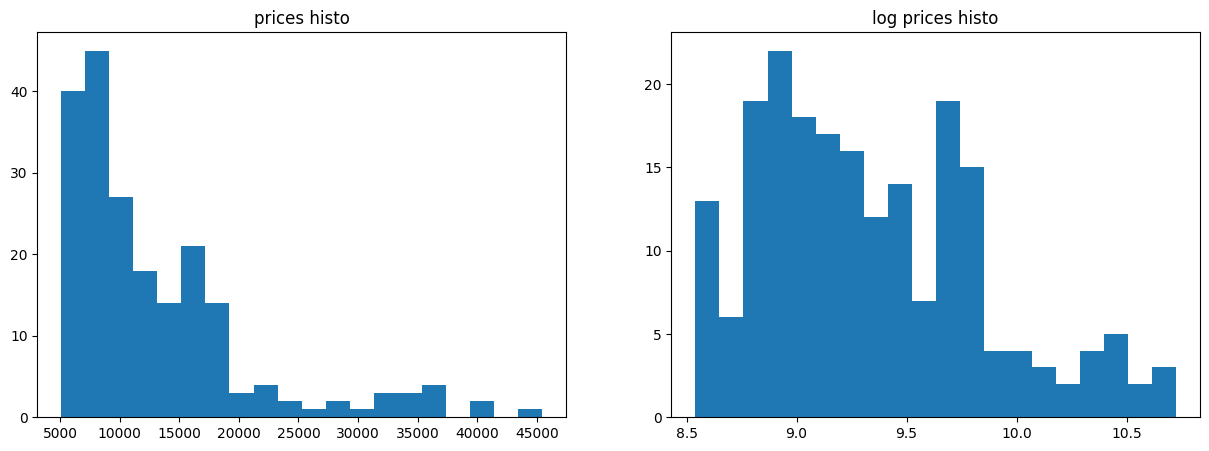

In [ ]:
# log scaling
# Log scaling is helpful when a handful of your values have many points, while most other values have few points. This data distribution is known as the power law distribution.
import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', '/content/auto.csv')

names, allData = loadDataMoreInputs(filePath)
prices = extractFeature(allData, names, 'price')
pricesLog = [log(p) for p in prices]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(prices, 20)
ax1.set_title('prices histo')
ax2.hist(pricesLog, 20)
ax2.set_title('log prices histo')
plt.show()



### Min-Max scalling <img src="images/MinMax.png" width="150">



Theoretical aspects:
* Converting floating-point feature values from their natural range (for example, 100 to 900) into a standard range — usually 0 and 1 (or sometimes -1 to +1). Use the following simple formula to scale to a range:

$$ x_i^{new} = \frac{x_i - min(x)}{max(x) - min(x)}$$

When to use: scaling to a range is a good choice when both of the following conditions are met:
* You know the approximate upper and lower bounds on your data with few or no outliers (we will end up with smaller standard deviations, which can suppress the effect of outliers)
* Your data is approximately uniformly distributed across that range.

Examples:
* A good example is age. Most age values falls between 0 and 90, and every part of the range has a substantial number of people.
* In contrast, you would not use scaling on income, because only a few people have very high incomes. The upper bound of the linear scale for income would be very high, and most people would be squeezed into a small part of the scale.


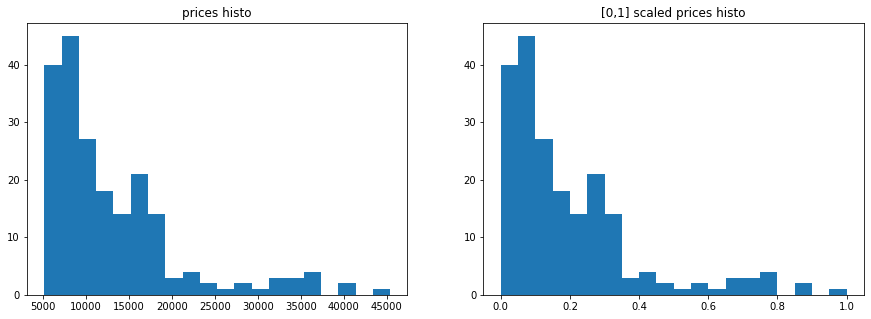

In [ ]:
# [0, 1] scalling
# it helps to map data into the same range
import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'auto.csv')

names, allData = loadDataMoreInputs(filePath)
prices = extractFeature(allData, names, 'price')
pricesScaled01 = [(p - min(prices)) / (max(prices) - min(prices)) for p in prices]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(prices, 20)
ax1.set_title('prices histo')
ax2.hist(pricesScaled01, 20)
ax2.set_title('[0,1] scaled prices histo')
plt.show()

### Z Normalisation (standardisation) <img src="images/zscore.svg" width="150">



Theoretical aspects:
* The result of standardization (or Z-score normalization) is that the features will be rescaled so that they will have the properties of a standard normal distribution with $\mu = 0$ and $\sigma = 1$ (where $\mu$ is the mean (average) and $\sigma$ is the standard deviation from the mean. Standard scores (also called z scores) of the samples are calculated as follows:

$$x_i = (x_i - \mu) / \sigma$$

$$stdev = \sqrt{\frac{\sum_{i}{(x_i- \mu)}^2}{n - 1}}$$


Properties:
* standardization does not change the type of distribution:
* This transformation sets the mean of data to 0 and the standard deviation to 1. Some effects (in the case of ML algorithms) of representing the features on similar scales:
    - in gradient descent, with features being on different scales, certain weights may update faster than others since the feature values play a role in the weight updates; standardization improves the numerical stability of GD model (X large $=>$ $\delta$w large $=>$ large leap in gradient landscape and smaller $w'$); standardization may speed up the training process (search coef in the same ranges)
    - K-Nearest Neighbor algorithms and clustering algorithms (as k-means) that use, for example, Euclidean distance measures (if want all features to contribute equally)

Remark: tree-based classifier are \[probably the only\] classifiers where feature scaling doesn’t make a difference.

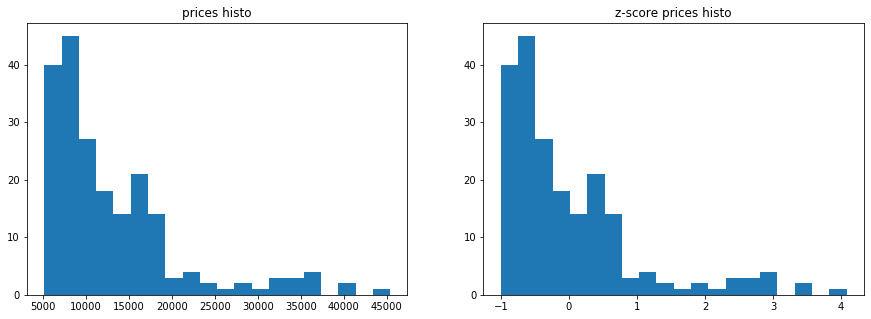

In [ ]:
# standardisation
# it preserves the data distribution
import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir,  'data', 'auto.csv')

names, allData = loadDataMoreInputs(filePath)
prices = extractFeature(allData, names, 'price')
m = sum(prices) / len(prices)
s = (1 / len(prices) * sum([ (p - m) ** 2 for p in prices])) ** 0.5
pricesZscore = [(p - m) / s for p in prices]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(prices, 20)
ax1.set_title('prices histo')
ax2.hist(pricesZscore, 20)
ax2.set_title('z-score prices histo')
plt.show()


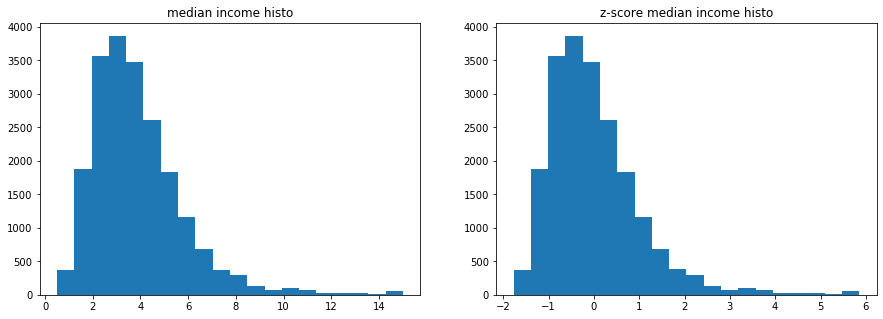

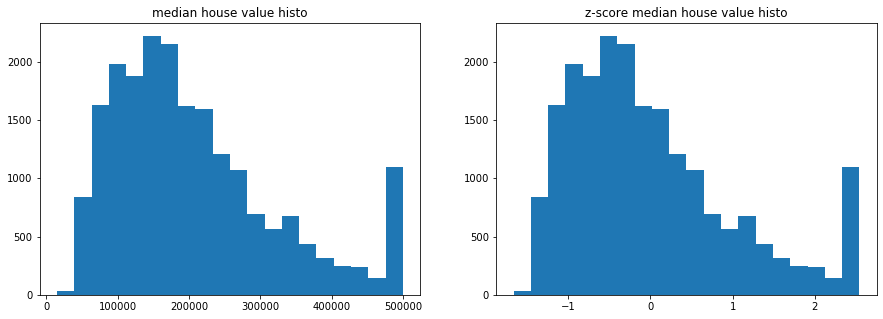

In [ ]:
# standardisation
# it helps to compare features that have different units or scales.
import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'data', 'housing.csv')

names, allData = loadDataMoreInputs(filePath)

medianIncome = extractFeature(allData, names, 'median_income')
m = sum(medianIncome) / len(medianIncome)
s = (1 / len(medianIncome) * sum([ (mi - m) ** 2 for mi in medianIncome])) ** 0.5
medianIncomeZscore = [(mi - m) / s for mi in medianIncome]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(medianIncome, 20)
ax1.set_title('median income histo')
ax2.hist(medianIncomeZscore, 20)
ax2.set_title('z-score median income histo')
plt.show()

medianHouseValue = extractFeature(allData, names, 'median_house_value')
m = sum(medianHouseValue) / len(medianHouseValue)
s = (1 / len(medianHouseValue) * sum([ (mi - m) ** 2 for mi in medianHouseValue])) ** 0.5
medianHouseValueZscore = [(mi - m) / s for mi in medianHouseValue]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
ax1.hist(medianHouseValue, 20)
ax1.set_title('median house value histo')
ax2.hist(medianHouseValueZscore, 20)
ax2.set_title('z-score median house value histo')
plt.show()

### Two features



Load another data and consider tow features.

If we want to create a regression model y = f(feature1, feature2) = w0 + w1 * feature1 + w2 * feature2 the coefficients w can be considered some weight (coefficients of importance) in this case feature1 and feature2 must be expressed in the same terms/units (by using the same scale) therefore, before to solve the regression problem, data must be normalised.

There are different methods for normalisation
* to map the definition domain of each feature to \[0,1\]
* to map the data such as they are centered around 0 and their standard deviation is 1


In [ ]:
from sklearn.datasets import load_wine, load_iris, load_linnerud
import matplotlib.pyplot as plt
from statistics import mean, stdev

# load some data
data = load_wine()
features = data['data']
target = data['target']
featureNames = data['feature_names']
# print(featureNames)


In [ ]:
# consider only two features and identify their definition domain
feature1 = extractFeature(features, featureNames, 'alcohol')
feature2 = extractFeature(features, featureNames, 'malic_acid')

minFeature1 = min(feature1)
maxFeature1 = max(feature1)

minFeature2 = min(feature2)
maxFeature2 = max(feature2)

print('def domain for feature1: [', minFeature1, ', ', maxFeature1, ']')
print('def domain for feature2: [', minFeature2, ', ', maxFeature2, ']')

def domain for feature1: [ 11.03 ,  14.83 ]
def domain for feature2: [ 0.74 ,  5.8 ]


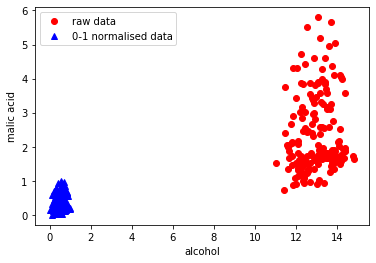

In [ ]:
# map the feature's values to [0,1]
def scale01(features):
    minFeat = min(features)
    maxFeat = max(features)
    scaledFeatures = [(feat - minFeat) / (maxFeat - minFeat) for feat in features]
    return scaledFeatures

feature1scaled01 = scale01(feature1)
feature2scaled01 = scale01(feature2)

import matplotlib.pyplot as plt
plt.plot(feature1, feature2, 'ro', label = 'raw data')
plt.plot(feature1scaled01, feature2scaled01, 'b^', label = '0-1 normalised data')
plt.legend()
plt.xlabel('alcohol')
plt.ylabel('malic acid')
plt.show()


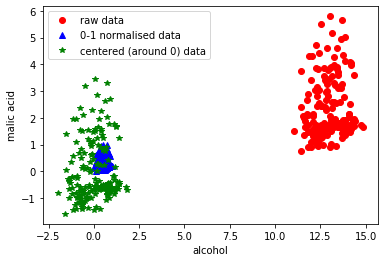

In [ ]:
# data centralisation
def zeroCentralisation(features):
    # meanValue = sum(features) / len(features)
    meanValue = mean(features)
    centeredFeatures = [feat - meanValue for feat in features]
    return centeredFeatures

feature1centered = zeroCentralisation(feature1)
feature2centered = zeroCentralisation(feature2)

plt.plot(feature1, feature2, 'ro', label = 'raw data')
plt.plot(feature1scaled01, feature2scaled01, 'b^', label = '0-1 normalised data')
plt.plot(feature1centered, feature2centered, 'g*', label = 'centered (around 0) data')
plt.legend()
plt.xlabel('alcohol')
plt.ylabel('malic acid')
plt.show()


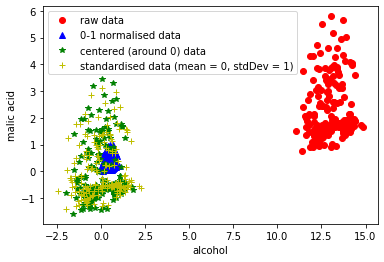

In [ ]:
# statistical normalisation (centered around meand and standardisation)
def statisticalNormalisation(features):
    # meanValue = sum(features) / len(features)
    meanValue = mean(features)
    # stdDevValue = (1 / len(features) * sum([ (feat - meanValue) ** 2 for feat in features])) ** 0.5
    stdDevValue = stdev(features)
    normalisedFeatures = [(feat - meanValue) / stdDevValue for feat in features]
    return normalisedFeatures

feature1normalised = statisticalNormalisation(feature1)
feature2normalised = statisticalNormalisation(feature2)

plt.plot(feature1, feature2, 'ro', label = 'raw data')
plt.plot(feature1scaled01, feature2scaled01, 'b^', label = '0-1 normalised data')
plt.plot(feature1centered, feature2centered, 'g*', label = 'centered (around 0) data')
plt.plot(feature1normalised, feature2normalised, 'y+', label = 'standardised data (mean = 0, stdDev = 1)')
plt.legend()
plt.xlabel('alcohol')
plt.ylabel('malic acid')
plt.show()

### Optional disscussion



$L^2$ normalisation <img src="images/l2normalisation.png" width="250">

$$x_i^{new} = \frac{x_i}{L_{2}norm(x)},$$
where $$L_{2}norm(x) = \sqrt{x_1^2 + x_2^2 + ...}$$